<a href="https://colab.research.google.com/github/Strojove-uceni/23206-final-sign-language-recognition-in-video/blob/main/data_preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import math
import sys
import cv2
import io

from google.colab import drive

# Connect to Google Drive

In [3]:
drive.mount('/content/drive')

path = "/content/drive/MyDrive/Colab Notebooks/SU2/data"

Mounted at /content/drive


# Load data informations

In [4]:
!git config --global jiri.nabelek@email.cz

In [5]:
!git clone https://github.com/Strojove-uceni/23206-final-sign-language-recognition-in-video.git

Cloning into '23206-final-sign-language-recognition-in-video'...
fatal: could not read Username for 'https://github.com': No such device or address


In [6]:
df_train = pd.read_csv(path + "/train.csv", sep=",")
df_train.head()

,path,participant_id,sequence_id,sign
0,train_landmark_files/26734/1000035562.parquet,26734,1000035562,blow
1,train_landmark_files/28656/1000106739.parquet,28656,1000106739,wait
2,train_landmark_files/16069/100015657.parquet,16069,100015657,cloud
3,train_landmark_files/25571/1000210073.parquet,25571,1000210073,bird
4,train_landmark_files/62590/1000240708.parquet,62590,1000240708,owie


In [7]:
df_train[df_train.sequence_id == 1119409279]

,path,participant_id,sequence_id,sign
2895,train_landmark_files/16069/1119409279.parquet,16069,1119409279,tongue


# Load one file in linked repository

In [8]:
class Sign:
  def __init__(self, path, participant_id, sequence_id, sign):
    self.path = path + "/train_landmark_files/" + str(participant_id) + "/" + str(sequence_id) + ".parquet"
    self.participant_id = participant_id
    self.sequence_id = sequence_id
    self.sign = sign
    self.df = pd.read_parquet(self.path, engine='pyarrow')

  def display(self):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(self.df.x.values, self.df.y.values, self.df.z.values, c='r', marker='o') # You can customize the color and marker

    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')

    plt.show()

In [9]:
test = Sign(path, 2044, 1001950812, "milk")

KeyboardInterrupt: ignored

In [10]:
test.display()

NameError: ignored

# Load all files in linked repository

(Načtení jedné složky trvá zatraceně dlouho)

In [11]:
class Data:
  def __init__(self):
    self.data = []

  def read_all(self, df):
    for participant_folder in os.listdir(path + "/train_landmark_files/"):
      path_folder = path + "/train_landmark_files/" + participant_folder + "/"
      for file_name in os.listdir(path_folder):
        file_num = int(file_name.split(".")[0])
        df_row = df_train[(df_train.participant_id == int(participant_folder)) & (df_train.sequence_id == file_num)]
        self.data.append(Sign(path, int(participant_folder), file_num, df_row.sign.values[0]))

In [12]:
# Dictionary for data
data = Data()
data.read_all(df_train)

In [13]:
data.data[0].df

,frame,row_id,type,landmark_index,x,y,z
0,22,22-face-0,face,0,0.457850,0.450046,-0.051791
1,22,22-face-1,face,1,0.447535,0.406658,-0.074625
2,22,22-face-2,face,2,0.452214,0.423228,-0.044922
3,22,22-face-3,face,3,0.440912,0.374283,-0.044314
4,22,22-face-4,face,4,0.447275,0.394827,-0.076723
...,...,...,...,...,...,...,...
9769,39,39-right_hand-16,right_hand,16,0.413427,0.593392,-0.109041
9770,39,39-right_hand-17,right_hand,17,0.281950,0.767291,-0.087446
9771,39,39-right_hand-18,right_hand,18,0.342155,0.710287,-0.115543
9772,39,39-right_hand-19,right_hand,19,0.379627,0.713385,-0.110798


In [14]:
df_problem = data.data[4810].df.copy()

In [15]:
df_problem[df_problem.frame == 86]

,frame,row_id,type,landmark_index,x,y,z
3801,86,86-face-0,face,0,0.497231,0.369744,-0.056002
3802,86,86-face-1,face,1,0.489530,0.319647,-0.073550
3803,86,86-face-2,face,2,0.489442,0.338006,-0.047235
3804,86,86-face-3,face,3,0.482609,0.286472,-0.043559
3805,86,86-face-4,face,4,0.490636,0.307343,-0.074552
...,...,...,...,...,...,...,...
4339,86,86-right_hand-16,right_hand,16,NaN,NaN,NaN
4340,86,86-right_hand-17,right_hand,17,NaN,NaN,NaN
4341,86,86-right_hand-18,right_hand,18,NaN,NaN,NaN
4342,86,86-right_hand-19,right_hand,19,NaN,NaN,NaN


In [16]:
df_frame = df_problem[df_problem.frame == 86].copy()

In [17]:
df_frame["type"].unique()

array(['face', 'left_hand', 'pose', 'right_hand'], dtype=object)

In [18]:
selected_landmark_indices = [33, 133, 159, 263, 46, 70, 4, 454, 234, 10, 338, 297, 332, 61, 291, 0, 78, 14, 317,
                             152, 155, 337, 299, 333, 69, 104, 68, 398]

In [19]:
l = len(df_frame[df_frame["type"] == "left_hand"])
r = len(df_frame[df_frame["type"] == "right_hand"])
p = len(df_frame[df_frame["type"] == "pose"])
f = len(selected_landmark_indices)
print(r+l+f)

70


In [22]:
num_len = pd.read_csv("./part_len.csv")
print(num_len)

       Unnamed: 0  participant    file_num  \
0               0        16069   100015657   
1               1        16069  1002113535   
2               2        16069    10042041   
3               3        16069  1004211348   
4               4        16069   100438640   
...           ...          ...         ...   
94472       94472        62590   995270127   
94473       94473        62590   998698928   
94474       94474        62590   999004932   
94475       94475        62590   999231022   
94476       94476        62590   999317239   

                                                  length  
0      [103 104 105 106 107 108 109 110 111 112 113 1...  
1                                    [21 22 23 24 25 26]  
2      [ 83  84  85  86  87  88  89  90  91  92  93  ...  
3      [  9  10  11  12  13  14  15  16  17  18  19  ...  
4      [ 96  97  98  99 100 101 102 103 104 105 106 1...  
...                                                  ...  
94472  [100 101 102 103 104 105 10

In [24]:
num_len["num"] = [len(num_len["length"].values[i]) for i in range(len(num_len),)]
num_len.describe()

,Unnamed: 0,participant,file_num,num
count,94477.000000,94477.000000,9.447700e+04,94477.000000
mean,47238.000000,33678.632366,2.149377e+09,137.273622
std,27273.305028,16138.124387,1.239239e+09,182.618569
min,0.000000,2044.000000,8.528200e+04,5.000000
25%,23619.000000,25571.000000,1.078076e+09,37.000000
50%,47238.000000,32319.000000,2.154240e+09,67.000000
75%,70857.000000,49445.000000,3.218820e+09,140.000000
max,94476.000000,62590.000000,4.294915e+09,2178.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7ea3fb18d7e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ea3fb18f100>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ea3fb18cd30>],
 'medians': [<matplotlib.lines.Line2D at 0x7ea3fb18e830>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ea3fb18cbb0>],
 'means': []}

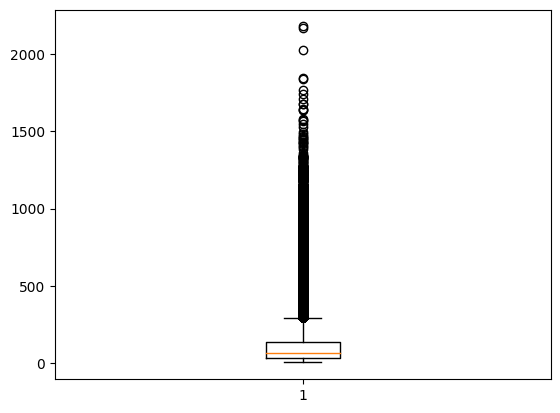

In [25]:
plt.boxplot(num_len["num"])

In [21]:
for i in range(len(data.data)):
  if(data.data[i].sequence_id == 1119409279):
    print(i)

4810
